In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

### Introduction

Belanja online adalah suatu bentuk pembelian yang besar dan terus berkembang dan mewakili sebagian besar pendapatan B2C (Business to Customer). 69% orang Amerika pernah berbelanja online di beberapa online shop, dengan pendapatan rata-rata $ 1804 per pembelanja online. 36% orang Amerika berbelanja online setidaknya sebulan sekali. Mempelajari bagaimana dan kapan pembeli akan meneliti dan membeli barang secara online penting bagi bisnis karena mereka dapat menggunakan wawasan perilaku pelanggan untuk menargetkan iklan, pemasaran, dan penawaran kepada calon pelanggan untuk lebih meningkatkan penjualan dan pendapatan mereka.

### Problem

Karena COVID-19 terus menyebar ke seluruh dunia dan kebanyakan orang di dunia mempraktikkan 'Stay Home, Save Life', ONLIE SHOPPING tidak hanya menjadi pilihan lagi, tetapi juga solusi kehidupan sehari-hari yang penting.

Kami memiliki alasan untuk meyakini bahwa penjualan online akan memainkan peran yang lebih penting dalam bisnis kami. Diyakini juga bahwa sekarang adalah waktu yang tepat untuk meningkatkan kinerja online kita.

Peningkatan dalam adopsi dan penetrasi Internet telah mengubah pasar online menjadi saluran distribusi penting tempat konsumen dan bisnis berinteraksi satu sama lain. Tetapi fakta bahwa tingkat konversi tidak meningkat pada tingkat yang sama mengarah pada kebutuhan akan solusi. Kami akan menganalisis berbagai fitur seperti durasi waktu di halaman, Exit rate, nilai halaman, dll dan memprediksi apakah mereka melakukan transaksi atau tidak.

### Goals

- Model dapat memprediksi pelanggan yang akan menghasilkan keuntungan untuk e-commerce
- Mengurangi tingkat bounce rate/exit

### Data Collection

In [2]:
df_online = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df_online.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Describe Data and Handling Missing Value

In [4]:
df_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

#### Features :
- Administrative: Jumlah halaman yang dikunjungi oleh pengunjung tentang manajemen akun
- Administrative duration: Jumlah waktu (dalam detik) yang dihabiskan oleh pengunjung pada halaman manajemen akun
- Informational: Jumlah halaman yang dikunjungi oleh pengunjung tentang situs Web, informasi dan alamat situs belanja
- Informational duration: Jumlah waktu (dalam detik) yang dihabiskan oleh pengunjung di halaman informasi
- Product related: Jumlah halaman yang dikunjungi oleh pengunjung tentang produk terkait 
- Product related duration: Jumlah waktu (dalam detik) yang dihabiskan oleh pengunjung pada halaman produk terkait 

- Bounce rate: Angka presentase kunjungan ke single-page yang tidak diikuti oleh tindakan selanjutnya (pengunjung langsung keluar)
- Exit rate: Presentase keluar dari halaman terakhir yang dikunjungi oleh pengunjung sebelum keluar dari situs
- Page value: Nilai rata-rata untuk halaman web yang dikunjungi pengguna sebelum menyelesaikan transaksi e-commerce

Metrik diukur dengan "Google Analytics" untuk setiap halaman di situs e-commerce.

- Special Day: Menunjukkan kedekatan waktu kunjungan situs dengan hari khusus tertentu (mis. Hari Ibu, Hari Valentine) di mana sesi lebih mungkin diselesaikan dengan transaksi. Misalnya, untuk hari Valentina, nilai ini mengambil nilai bukan nol antara 2 Februari dan 12 Februari, nol, sebelum dan sesudah tanggal ini kecuali jika dekat dengan hari istimewa lainnya, dan nilai maksimumnya 1 pada 8 Februari

- Operating system,browser, region, traffic type : Berbagai jenis sistem operasi, browser, wilayah, dan jenis traffic yang digunakan untuk mengunjungi situs web
- Visitor type : Apakah pelanggan yang kembali atau pengunjung baru
- Weekend : Nilai Boolean yang menunjukkan apakah tanggal kunjungan adalah akhir pekan
- Month : Bulan kunjungan situs web

In [5]:
df_online.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Dapat dilihat data diatas memiliki nilai null di beberapa feature seperti Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, dan ExitRates. Masing-masing dari fitur tersebut memiliki nilai null sebesar 14. Agar nilai null ini tidak menjadi masalah ketika mengolah data saya memutuskan untuk menghapus nilai null tersebut.

In [6]:
df_online.dropna(inplace = True)

In [7]:
df_online.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Nilai null yang terdapat pada data sekarang sudah berhasil di hilangkan

In [8]:
df_online.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [9]:
df_online.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.895952,0.061497,2.124147,2.357584,3.148019,4.070477
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.577926,0.199020,0.911566,1.718028,2.402211,4.024598
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [10]:
df_online.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Dapat dilihat pada feature Administrative_Duration, Informational_Duration, dan ProductRelated_Duration terdapat beberapa nilai negatif yang dimana hal tersebut tidak masuk akal. 

In [11]:
neg_ad_dur = df_online[df_online['Administrative_Duration'] < 0]
neg_info_dur = df_online[df_online['Informational_Duration'] < 0]
neg_prd_dur = df_online[df_online['ProductRelated_Duration'] < 0]
print(" The length of each durations are {} ,{} , {}".format(len(neg_ad_dur), len(neg_info_dur),len(neg_prd_dur)))

 The length of each durations are 33 ,33 , 33


Setelah dicek kembali kita temukan sebanyak 33 nilai -1 dari tiap feature tersebut dan tentunya kita akan drop nilai tersebut

In [12]:
# Dropping the negative Durations
df_online = df_online.drop(df_online[df_online['Administrative_Duration'] < 0].index)
df_online = df_online.drop(df_online[df_online['Informational_Duration'] < 0].index)
df_online = df_online.drop(df_online[df_online['ProductRelated_Duration'] < 0].index)
#Checking , no negative values
df_online.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000
mean,2.323862,81.126229,0.505333,34.601780,31.846536,1199.253065,0.021723,0.042611,5.911793,0.061532,2.124318,2.356997,3.147114,4.071969
std,3.325128,177.046838,1.272138,141.002498,44.521443,1915.935446,0.047686,0.047964,18.600350,0.199122,0.911718,1.717264,2.401981,4.025428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,187.100000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,602.500000,0.003077,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.950000,0.000000,0.000000,38.000000,1470.909852,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Sekarang data yang berisikan -1 pada duration telah tidak ada

### EDA

In [13]:
df_online['TrafficType'].value_counts()

2     3907
1     2435
3     2036
4     1067
13     736
10     450
6      442
8      343
5      259
11     247
20     197
9       42
7       40
15      37
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

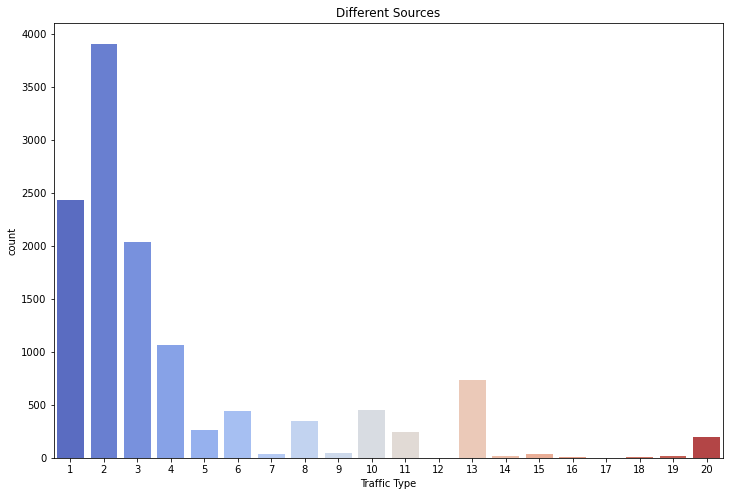

In [14]:
# Distribution of customers based on Traffic Type
plt.figure(figsize = (12,8))
sns.countplot(df_online['TrafficType'],palette='coolwarm')
plt.title('Different Sources')
plt.xlabel('Traffic Type')
plt.ylabel('count');

Traffic type 2 adalah sumber iklan terbaik untuk situs web. Harus mempertimbangkan sumber lain dan memutuskan apakah diperlukan atau tidak

In [15]:
df_online['Region'].value_counts()

1    4765
3    2394
4    1175
2    1130
6     804
7     758
9     508
8     434
5     315
Name: Region, dtype: int64

Text(0, 0.5, 'Number of Visitors')

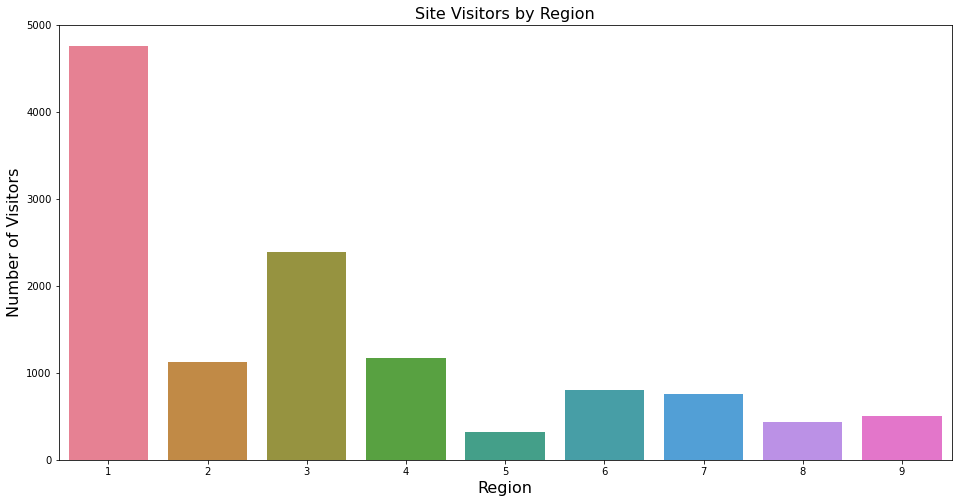

In [16]:
plt.figure(figsize = (16,8))
sns.countplot(df_online['Region'],palette='husl')
plt.title("Site Visitors by Region", fontsize = 16)
plt.xlabel("Region", fontsize = 16)
plt.ylabel("Number of Visitors", fontsize = 16)

Situs web ini umum di antara pelanggan wilayah 1. Harus memberikan promosi di daerah lain untuk meningkatkan penjualan

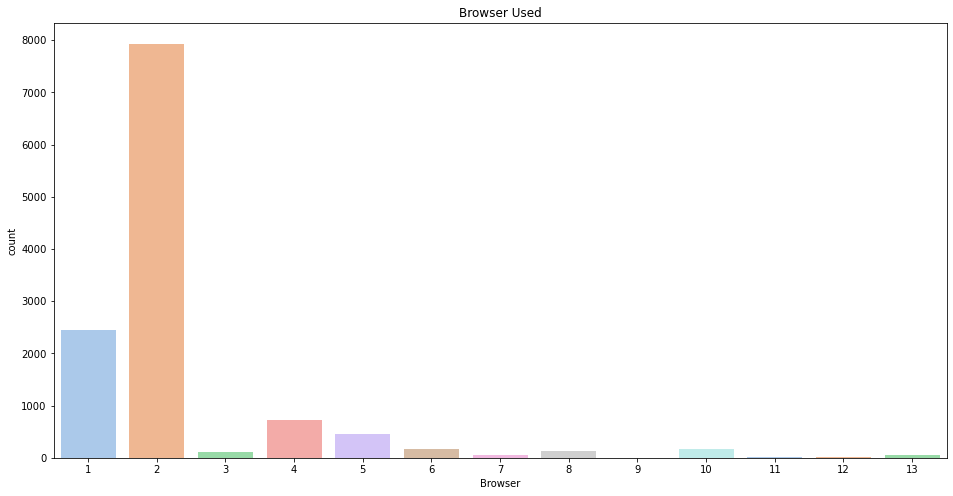

In [17]:
#Distribution of customers based on Browser
plt.figure(figsize = (16,8))
sns.countplot(df_online['Browser'],palette='pastel')
plt.title('Browser Used')
plt.xlabel('Browser')
plt.ylabel('count');

Browser 2 adalah browser yang paling sering digunakan selain browser 2 ada browser 1 juga yang memiliki jumlah pengguna cukup tinggi

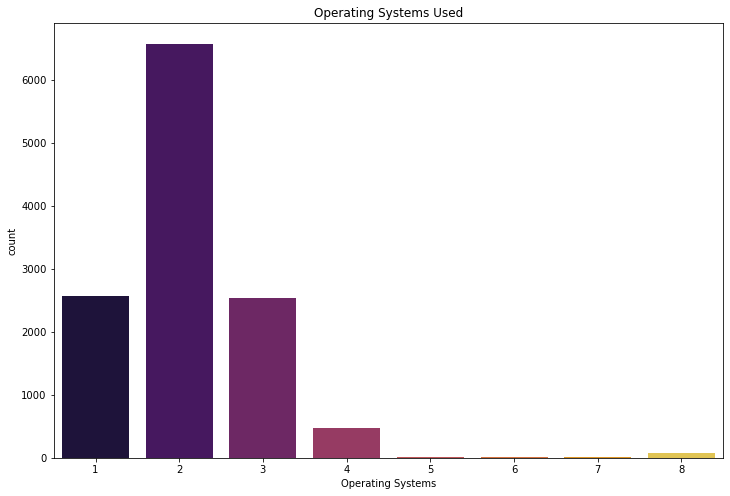

In [18]:
#Distribution of customers based on Operating Systems
plt.figure(figsize = (12,8))
sns.countplot(df_online['OperatingSystems'],palette='inferno')
plt.title('Operating Systems Used')
plt.xlabel('Operating Systems')
plt.ylabel('count');

Sistem Operasi (OS) 2 merupakan OS yang paling banyak digunakan selain itu ada OS 1 dan 3 yang sama-sama memiliki jumlah pengguna yang cukup tinggi, Dari gambar berikut dapat dilihat hubungan antara pertumbuhan pendapatan dan sistem operasi, wilayah browser dan sumber jenis lalu lintas. Sehubungan dengan OS, performa terbaik tetap "2" dalam kedua kasus, yaitu pengunjung dan pengunjung yang melakukan pembelian. Namun, posisi berikut sebaliknya diamankan dengan "1" dan "3". Sumber lain mendatangkan pelanggan yang jauh lebih rendah. Ini bisa berarti bahwa situs web tidak ramah pengguna pada sumber-sumber tersebut atau hanya karena sumber-sumber itu khusus, tidak banyak pelanggan yang menggunakannya. Sehubungan dengan browser, "2" tetap di atas diikuti oleh "1", "4", dan "5" dalam kedua kasus. Ini bisa menunjukkan alasan yang sama seperti OS. Berkenaan dengan wilayah, "1" tampaknya berkinerja jauh lebih baik diikuti oleh "3" di kedua kasus. Prospek "1" sangat signifikan yang menunjukkan bahwa jangkauan pemasaran di wilayah ini sudah berpengalaman. Ada ruang untuk perbaikan di wilayah lain. Sehubungan dengan jenis lalu lintas, "2" tetap memimpin diikuti dengan "1" dan "3", menunjukkan dampak pengoptimalan Google SEO.

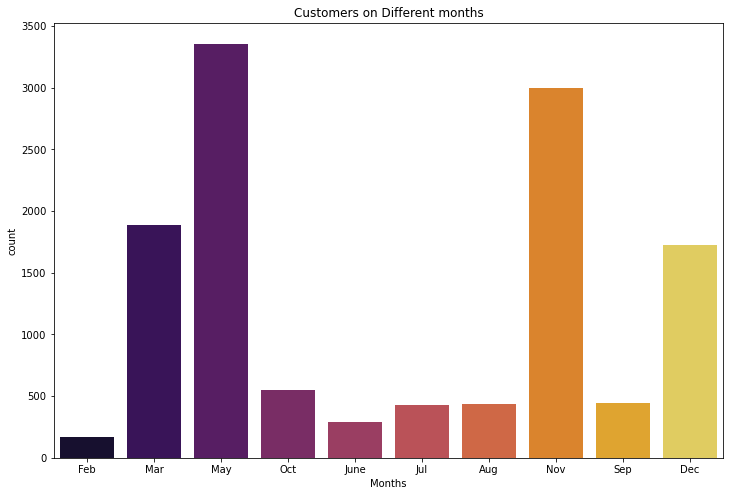

In [19]:
#Distribution of customers on Months
plt.figure(figsize = (12,8))
sns.countplot(df_online['Month'],palette='inferno')
plt.title('Customers on Different months')
plt.xlabel('Months')
plt.ylabel('count')
plt.show()

Dari tabel ini dapat kita lihat 10 bulan dipertimbangkan di sini, (kecuali Januari dan April). Di bulan Mei ini adalah bulan di mana situs web lebih umum digunakan. November, Maret, dan Desember juga cukup penting. Salah satu Festival Tradisional Turki (Festival Ahirkapi Hidirellez) akan diadakan di bulan Mei. Juga hari pemuda dan olahraga nasional dirayakan di bulan Mei. 

In [20]:
df_online.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601171,0.376374,0.255479,0.430116,0.372935,-0.221188,-0.314919,0.098267,-0.095300,-0.006594,-0.025055,-0.005385,-0.034072,0.025780,0.137970
Administrative_Duration,0.601171,1.000000,0.302304,0.237734,0.288277,0.354749,-0.142435,-0.204583,0.067096,-0.073636,-0.007523,-0.015399,-0.005517,-0.014680,0.014586,0.092911
Informational,0.376374,0.302304,1.000000,0.618880,0.373680,0.387065,-0.114485,-0.162471,0.048217,-0.048448,-0.009522,-0.038197,-0.029341,-0.034704,0.035234,0.094672
Informational_Duration,0.255479,0.237734,0.618880,1.000000,0.279701,0.347088,-0.073064,-0.104530,0.030579,-0.030731,-0.009656,-0.019296,-0.027190,-0.024855,0.023847,0.069984
ProductRelated,0.430116,0.288277,0.373680,0.279701,1.000000,0.860711,-0.201828,-0.290579,0.055521,-0.024348,0.004071,-0.013122,-0.038137,-0.043569,0.015496,0.157624
ProductRelated_Duration,0.372935,0.354749,0.387065,0.347088,0.860711,1.000000,-0.181990,-0.249958,0.052124,-0.036757,0.002773,-0.007352,-0.033093,-0.036831,0.006739,0.151528
BounceRates,-0.221188,-0.142435,-0.114485,-0.073064,-0.201828,-0.181990,1.000000,0.911252,-0.118532,0.074726,0.025334,-0.017798,-0.008184,0.081602,-0.044896,-0.149348
ExitRates,-0.314919,-0.204583,-0.162471,-0.104530,-0.290579,-0.249958,0.911252,1.000000,-0.174110,0.104718,0.015734,-0.005722,-0.010122,0.081245,-0.061203,-0.206145
PageValues,0.098267,0.067096,0.048217,0.030579,0.055521,0.052124,-0.118532,-0.174110,1.000000,-0.063777,0.018430,0.045707,0.011370,0.012369,0.011718,0.492317
SpecialDay,-0.095300,-0.073636,-0.048448,-0.030731,-0.024348,-0.036757,0.074726,0.104718,-0.063777,1.000000,0.012127,0.003472,-0.015864,0.052496,-0.016738,-0.082632


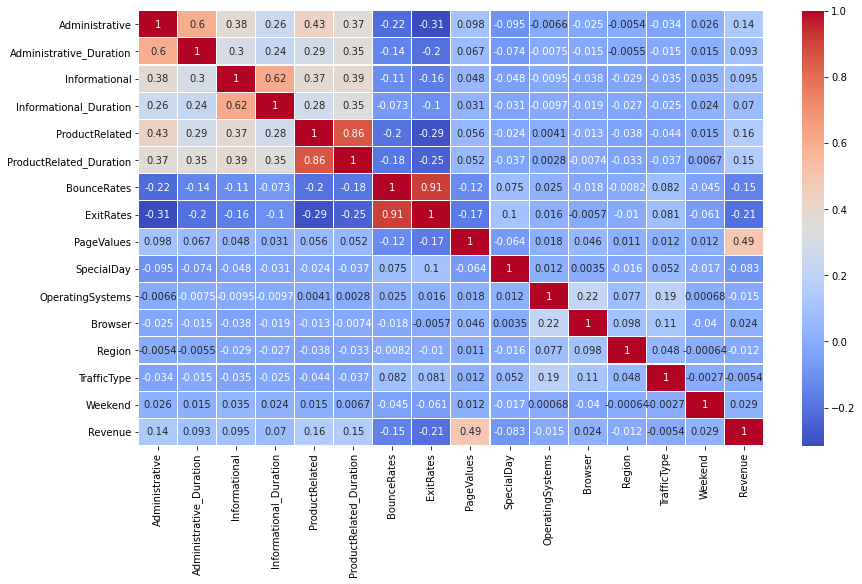

In [21]:
plt.figure(figsize=(14,8))
sns.heatmap(df_online.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

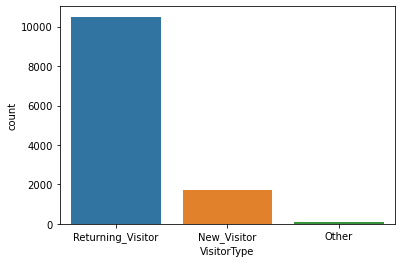

In [23]:
#different users
sns.countplot(x = df_online.VisitorType)

In [24]:
df_online['VisitorType'].value_counts()

Returning_Visitor    10504
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [25]:
df_online['SpecialDay'].value_counts()

0.0    11035
0.6      349
0.8      325
0.4      242
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

Text(0, 0.5, 'count')

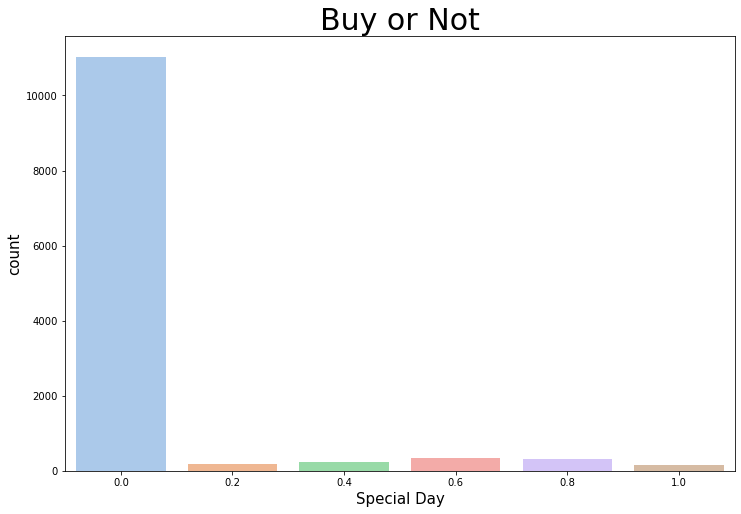

In [26]:
plt.figure(figsize = (12,8))
sns.countplot(df_online['SpecialDay'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 30)
plt.xlabel('Special Day', fontsize = 15)
plt.ylabel('count', fontsize = 15)

Text(0, 0.5, 'count')

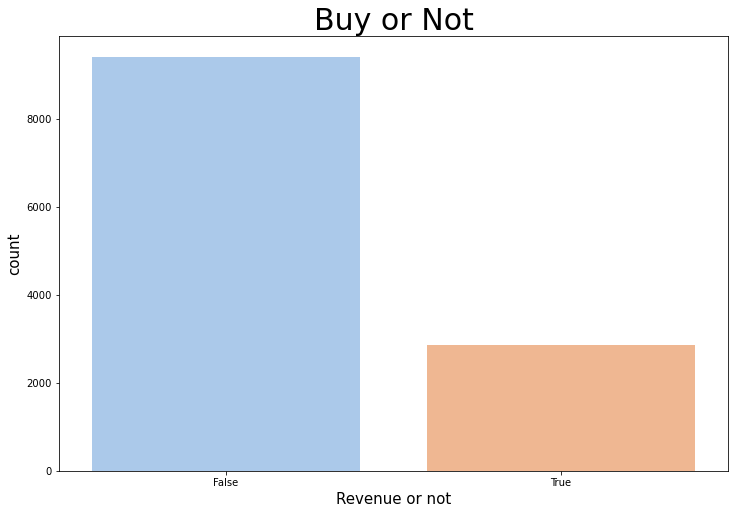

In [27]:
# checking the Distribution of customers on Revenue

plt.figure(figsize = (12,8))
sns.countplot(df_online['Weekend'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

In [28]:
print(round(sum(df_online['Revenue'])/len(df_online['Revenue']), 2)*100, "% of visitors generate revenue")

16.0 % of visitors generate revenue


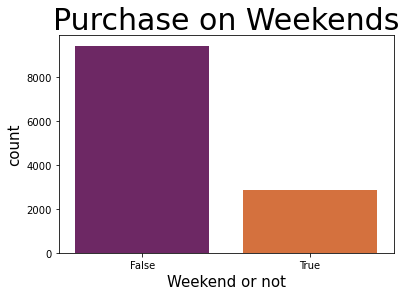

In [29]:
# checking the Distribution of customers on Weekend
sns.countplot(df_online['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

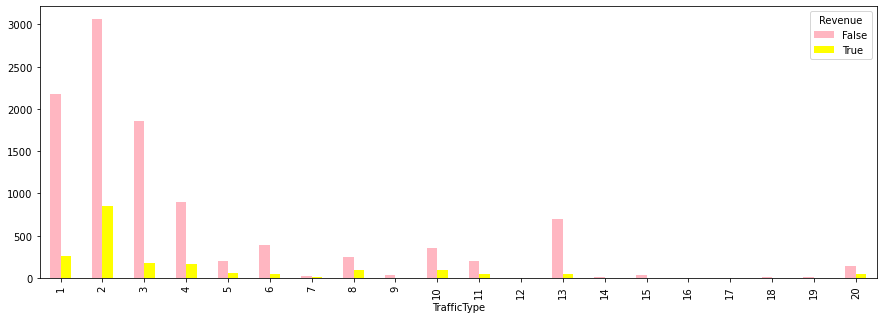

In [30]:
pd.crosstab(df_online['TrafficType'],df_online['Revenue']).plot(kind = 'bar', figsize = (15, 5), color = ['lightpink', 'yellow'])

In [31]:
df_vt = pd.crosstab(df_online.VisitorType, df_online.Revenue)
df_vt

Revenue,False,True
VisitorType,,
New_Visitor,1272,422
Other,69,16
Returning_Visitor,9034,1470


Text(0.5, 1.0, 'PageValues')

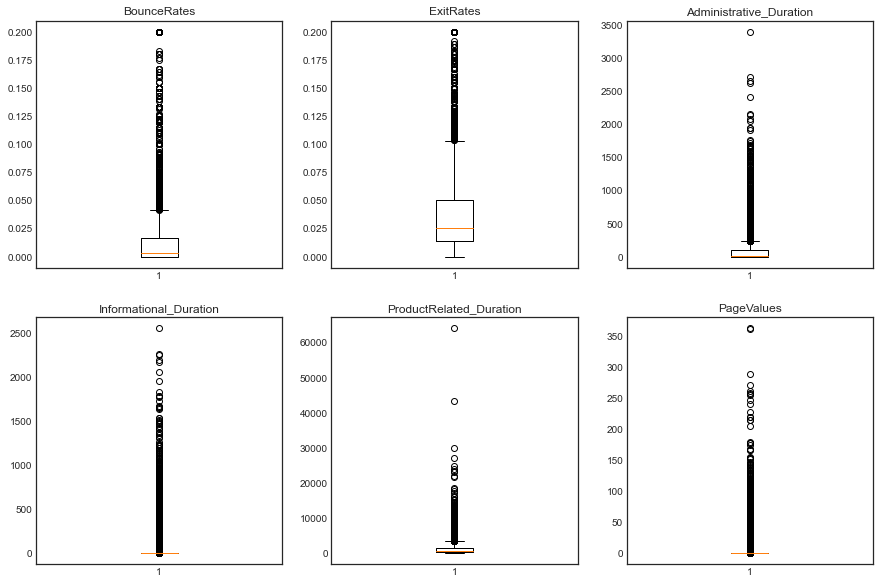

In [35]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(231)
plt.boxplot(df_online['BounceRates'])
ax.set_title('BounceRates')
ax=plt.subplot(232)
plt.boxplot(df_online['ExitRates'])
ax.set_title('ExitRates')
ax=plt.subplot(233)
plt.boxplot(df_online['Administrative_Duration'])
ax.set_title('Administrative_Duration')
ax=plt.subplot(234)
plt.boxplot(df_online['Informational_Duration'])
ax.set_title('Informational_Duration')
ax=plt.subplot(235)
plt.boxplot(df_online['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')
ax=plt.subplot(236)
plt.boxplot(df_online['PageValues'])
ax.set_title('PageValues')

Kami memiliki banyak pencilan, jika Anda melihat informational_duration dan nilai halaman, mereka tidak memiliki distribusi apa pun dan jika Anda menghapus pencilan akan ada satu nilai yang tersisa di dalamnya. Jadi kecuali dua fitur itu, kami menghapus pencilan melalui metode IQR

In [33]:
df_online['Revenue'].value_counts()/len(df_online) * 100

False    84.466336
True     15.533664
Name: Revenue, dtype: float64

In [34]:
df_online['VisitorType'].value_counts()

Returning_Visitor    10504
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [37]:
df_online.to_csv('df_online.csv')